In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
import numpy as np

from sklearn.metrics import mean_absolute_error, recall_score, precision_score, f1_score, confusion_matrix
from scipy.stats import spearmanr

sns.set_theme(style="whitegrid")

In [2]:
esen_d = pd.concat(
    [
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of4_esen-s-d.parquet"), 
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of4_esen-s-d.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_3of4_esen-s-d.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_4of4_esen-s-d.parquet"),
    ]
)
esen_d = esen_d.reset_index(drop=True)
esen_d["esen_d_strain"] = esen_d.local_min_e - esen_d.global_min_e
print(esen_d.shape)
esen_d.isna().sum()

(6947, 18)


ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
mol_bytes                     0
spin_multiplicity             0
id                            0
local_min_mol                83
local_min_e                  83
global_min_mol               53
global_min_e                 53
ligand_strain               134
passes_strain_filter          0
nconfs_converged              0
esen_d_strain               134
dtype: int64

In [3]:
esen_c = pd.concat(
    [
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of4_esen-s-c.parquet"), 
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of4_esen-s-c.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_3of4_esen-s-c.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_4of4_esen-s-c.parquet"),
    ]
)
esen_c = esen_c.reset_index(drop=True)
esen_c["esen_c_strain"] = esen_c.local_min_e - esen_c.global_min_e
print(esen_c.shape)
esen_c.isna().sum()

(6947, 18)


ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
mol_bytes                     0
spin_multiplicity             0
id                            0
local_min_mol                87
local_min_e                  87
global_min_mol                0
global_min_e                  0
ligand_strain                87
passes_strain_filter          0
nconfs_converged              0
esen_c_strain                87
dtype: int64

In [4]:
uma_s = pd.concat(
    [
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of4_uma-s.parquet"), 
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of4_uma-s.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_3of4_uma-s.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_4of4_uma-s.parquet"),
    ]
)
uma_s = uma_s.reset_index(drop=True)
uma_s["uma_s_strain"] = uma_s.local_min_e - uma_s.global_min_e
print(uma_s.shape)
uma_s.isna().sum()

(6947, 18)


ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
mol_bytes                     0
spin_multiplicity             0
id                            0
local_min_mol                82
local_min_e                  82
global_min_mol                0
global_min_e                  0
ligand_strain                82
passes_strain_filter          0
nconfs_converged              0
uma_s_strain                 82
dtype: int64

In [5]:
mace = pd.concat(
    [
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of2_mace.parquet"), 
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of2_mace.parquet")
    ]
)
mace = mace.reset_index(drop=True)
mace["mace_strain"] = mace.local_min_e - mace.global_min_e
print(mace.shape)
mace.isna().sum()

(6947, 18)


ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
mol_bytes                     0
spin_multiplicity             0
id                            0
local_min_mol              1752
local_min_e                1752
global_min_mol             1088
global_min_e               1088
ligand_strain              1895
passes_strain_filter          0
nconfs_converged              0
mace_strain                1895
dtype: int64

In [7]:
root = pd.read_parquet("../data/ligboundconf_2p1.parquet")
root["dft_strain"] = root.xtb_local_min_energy - root.crest_global_min_energy
root.isna().sum()

ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
dft_strain                 1859
dtype: int64

In [8]:
root = root[["ligand_id", "formal_charge", "dft_strain"]]
root = root.merge(esen_d[["ligand_id", "esen_d_strain"]], on="ligand_id", how="left")
root = root.merge(mace[["ligand_id", "mace_strain"]], on="ligand_id", how="left")
root = root.merge(esen_c[["ligand_id", "esen_c_strain"]], on="ligand_id", how="left")
root = root.merge(uma_s[["ligand_id", "uma_s_strain"]], on="ligand_id", how="left")
root = root[root.formal_charge != 0]
print(root.shape)

root.head()

(3970, 7)


,ligand_id,formal_charge,dft_strain,esen_d_strain,mace_strain,esen_c_strain,uma_s_strain
1,01I_3MA3_A_313,-2,0.199977,0.866547,0.585522,1.063842,1.020427
5,04J_4KN1_A_301,-2,NaN,17.278944,27.204240,18.192799,17.977704
7,051_2XPC_A_500,-2,NaN,NaN,NaN,NaN,NaN
8,052_4ZEG_A_809,1,NaN,18.943307,15.944207,22.331224,22.132151
9,053_3SKA_A_578,-1,NaN,2.468894,3.332970,2.282521,2.273075


In [11]:
palette = {
    "dft": "tab:gray",
    "mace": "tab:blue",
    "esen_s_d": "tab:orange",
    "esen_s_c": "tab:green",
    "uma_s": "tab:red",
    "dft_strain": "tab:gray",
    "mace_strain": "tab:blue",
    "esen_d_strain": "tab:orange",
    "esen_c_strain": "tab:green",
    "uma_s_strain": "tab:red",
    "mace_error": "tab:blue",
    "esen_d_error": "tab:orange",
    "esen_c_error": "tab:green",
    "uma_s_error": "tab:red",
}

In [10]:
df = pd.DataFrame(
    {
        "isna": root.isna().sum(),
        "neg": root.select_dtypes(include=[np.number]).apply(lambda x: (x < 0).sum())
    }
)
df = df.fillna(0)
df["isna"] = df["isna"].astype(int)
df["neg"] = df["neg"].astype(int)
df["failed"] = df["neg"] + df["isna"]
df = df.drop(["formal_charge", "ligand_id"], axis=0)
df

,isna,neg,failed
dft_strain,1673,293,1966
esen_c_strain,44,0,44
esen_d_strain,76,35,111
mace_strain,1541,23,1564
uma_s_strain,44,0,44


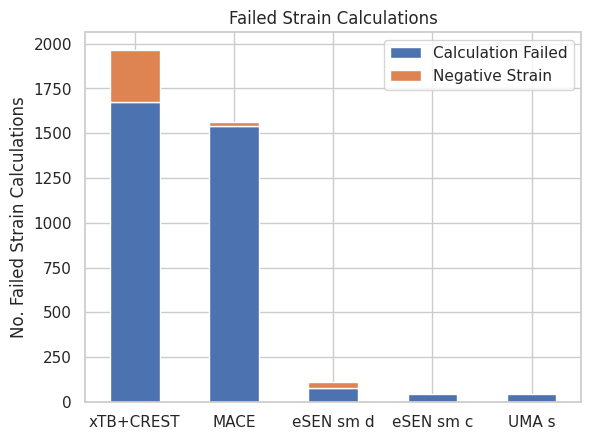

In [13]:
df = df.loc[["dft_strain", "mace_strain", "esen_d_strain", "esen_c_strain", "uma_s_strain"]]
df[["isna", "neg"]].plot(kind="bar", stacked=True)
plt.xticks(rotation=0, ticks=range(5), labels=["xTB+CREST", "MACE", "eSEN sm d", "eSEN sm c", "UMA s"])
plt.legend(labels=["Calculation Failed", "Negative Strain"])
plt.xlabel("")
plt.ylabel("No. Failed Strain Calculations")
plt.title("Failed Strain Calculations")
plt.show()

In [14]:
# map all negative strains to 0
root.loc[root.dft_strain < 0, "dft_strain"] = np.nan
root.loc[root.esen_c_strain < 0, "esen_c_strain"] = np.nan
root.loc[root.esen_d_strain < 0, "esen_d_strain"] = np.nan
root.loc[root.uma_s_strain < 0, "uma_s_strain"] = np.nan
root.loc[root.mace_strain < 0, "mace_strain"] = np.nan

root = root.dropna(subset="dft_strain")

In [15]:
threshold = root.dft_strain.quantile(0.95)
threshold

np.float64(34.384305514721184)

In [16]:
threshold = 14.7

In [17]:
root["passes_dft_filter"] = root.dft_strain < threshold
root["passes_mace_filter"] = root.mace_strain < threshold
root["passes_esen_c_filter"] = root.esen_c_strain < threshold
root["passes_esen_d_filter"] = root.esen_d_strain < threshold
root["passes_uma_s_filter"] = root.uma_s_strain < threshold

In [18]:
mace_no_nan = root.dropna(subset="mace_strain")
esen_d_no_nan = root.dropna(subset="esen_d_strain")
esen_c_no_nan = root.dropna(subset="esen_c_strain")
uma_s_no_nan = root.dropna(subset="uma_s_strain")

mace_no_nan.shape, esen_d_no_nan.shape, esen_c_no_nan.shape, uma_s_no_nan.shape, root.shape


((1301, 12), (1949, 12), (1969, 12), (1975, 12), (2004, 12))

In [19]:
print("Failed StrainRelief runs")
print(f"MACE: {root.mace_strain.isna().sum()} failed, {root[root.mace_strain.isna() & ~root.passes_dft_filter].shape[0]} strained ({root[root.mace_strain.isna() & ~root.passes_dft_filter].shape[0]/root.mace_strain.isna().sum():.1%})")
print(f"eSEN s d: {root.esen_d_strain.isna().sum()} failed, {root[root.esen_d_strain.isna() & ~root.passes_dft_filter].shape[0]} strained ({root[root.esen_d_strain.isna() & ~root.passes_dft_filter].shape[0]/root.esen_d_strain.isna().sum():.1%})")
print(f"eSEN s c: {root.esen_c_strain.isna().sum()} failed, {root[root.esen_c_strain.isna() & ~root.passes_dft_filter].shape[0]} strained ({root[root.esen_c_strain.isna() & ~root.passes_dft_filter].shape[0]/root.esen_c_strain.isna().sum():.1%})")
print(f"UMA s: {root.uma_s_strain.isna().sum()} failed, {root[root.uma_s_strain.isna() & ~root.passes_dft_filter].shape[0]} strained ({root[root.uma_s_strain.isna() & ~root.passes_dft_filter].shape[0]/root.uma_s_strain.isna().sum():.1%})")

Failed StrainRelief runs
MACE: 703 failed, 246 strained (35.0%)
eSEN s d: 55 failed, 12 strained (21.8%)
eSEN s c: 35 failed, 8 strained (22.9%)
UMA s: 29 failed, 8 strained (27.6%)


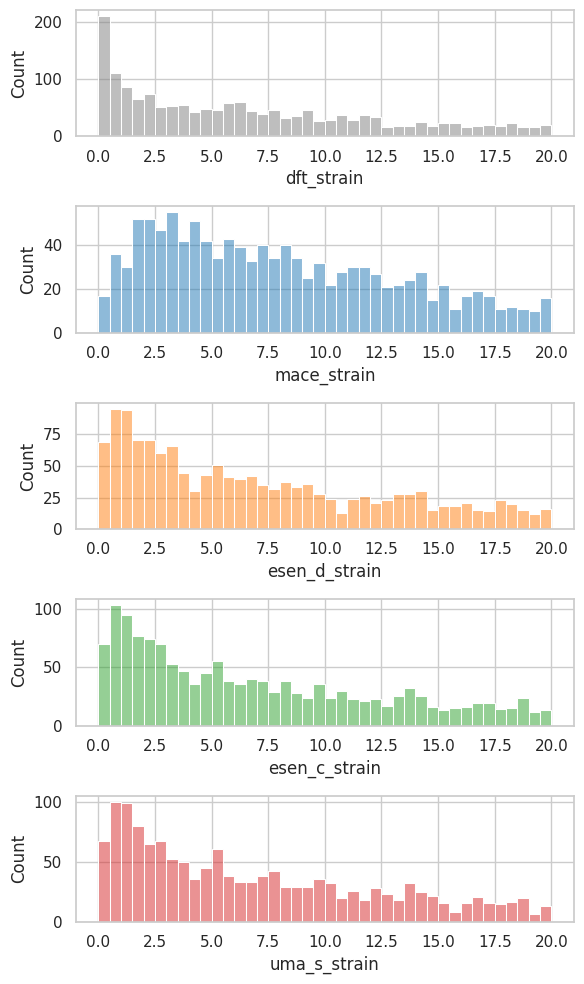

In [20]:
fig, axs = plt.subplots(5, 1, figsize=(6, 10))

sns.histplot(root.dft_strain, label="DFT", alpha=0.5, binwidth=0.5, binrange=(0, 20), ax=axs[0], color=palette["dft_strain"])
sns.histplot(root.mace_strain, label="MACE", alpha=0.5, binwidth=0.5, binrange=(0, 20), ax=axs[1], color=palette["mace_strain"])
sns.histplot(root.esen_d_strain, label="eSEN s d", alpha=0.5, binwidth=0.5, binrange=(0, 20), ax=axs[2], color=palette["esen_d_strain"])
sns.histplot(root.esen_c_strain, label="eSEN s c", alpha=0.5, binwidth=0.5, binrange=(0, 20), ax=axs[3], color=palette["esen_c_strain"])
sns.histplot(root.uma_s_strain, label="UMA s", alpha=0.5, binwidth=0.5, binrange=(0, 20), ax=axs[4], color=palette["uma_s_strain"])

plt.tight_layout()
plt.show()


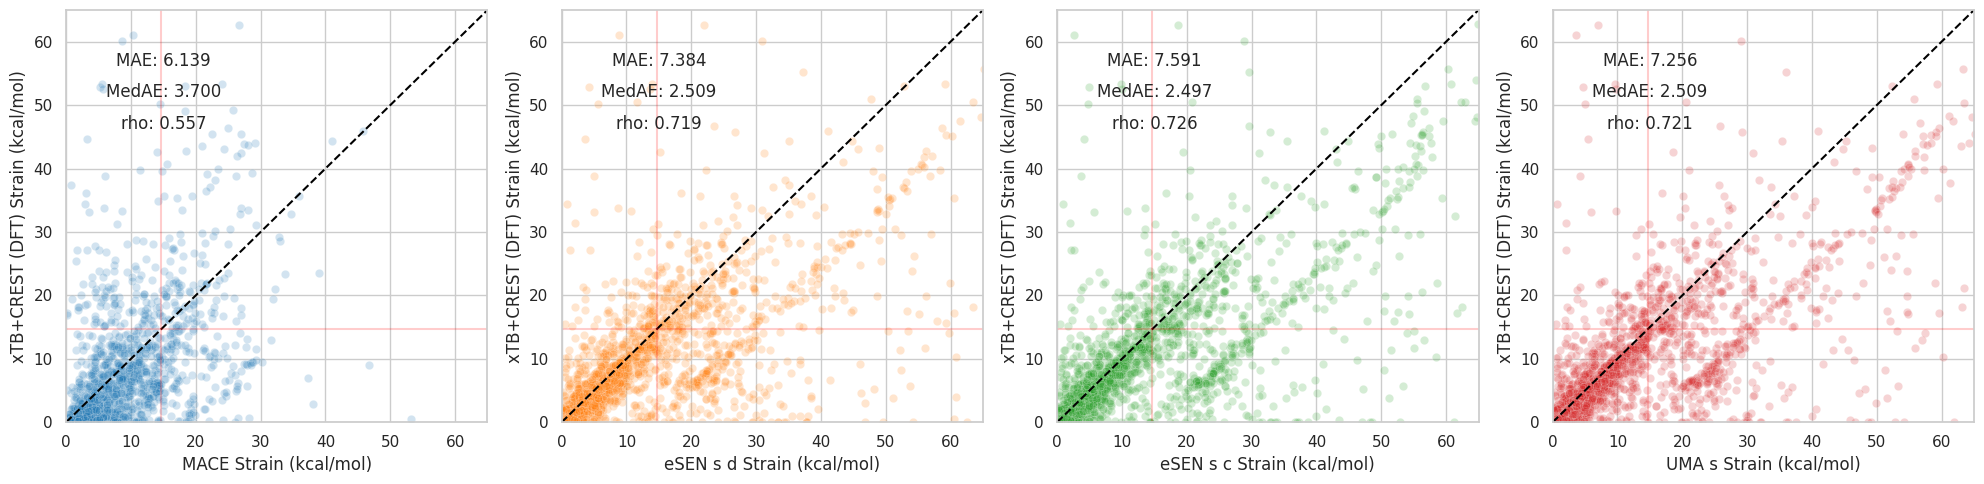

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.scatterplot(x="mace_strain", y="dft_strain", data=root, alpha=0.2, ax=axs[0], color=palette["mace_strain"])
sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--", ax=axs[0])
axs[0].text(15, 57, f"MAE: {mean_absolute_error(mace_no_nan.mace_strain, mace_no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
axs[0].text(15, 52, f"MedAE: {np.median(abs(mace_no_nan.mace_strain - mace_no_nan.dft_strain)):.3f}", fontsize=12, ha="center", va="center")
axs[0].text(15, 47, f"rho: {spearmanr(mace_no_nan.mace_strain, mace_no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center")
axs[0].set(xlabel="MACE Strain (kcal/mol)")

sns.scatterplot(x="esen_d_strain", y="dft_strain", data=root, alpha=0.2, ax=axs[1], color=palette["esen_d_strain"])
sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--", ax=axs[1])
axs[1].text(15, 57, f"MAE: {mean_absolute_error(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
axs[1].text(15, 52, f"MedAE: {np.median(abs(esen_d_no_nan.esen_d_strain - esen_d_no_nan.dft_strain)):.3f}", fontsize=12, ha="center", va="center")
axs[1].text(15, 47, f"rho: {spearmanr(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center")
axs[1].set(xlabel="eSEN s d Strain (kcal/mol)")

sns.scatterplot(x="esen_c_strain", y="dft_strain", data=root, alpha=0.2, ax=axs[2], color=palette["esen_c_strain"])
sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--", ax=axs[2])
axs[2].text(15, 57, f"MAE: {mean_absolute_error(esen_c_no_nan.esen_c_strain, esen_c_no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
axs[2].text(15, 52, f"MedAE: {np.median(abs(esen_c_no_nan.esen_c_strain - esen_c_no_nan.dft_strain)):.3f}", fontsize=12, ha="center", va="center")
axs[2].text(15, 47, f"rho: {spearmanr(esen_c_no_nan.esen_c_strain, esen_c_no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center") 
axs[2].set(xlabel="eSEN s c Strain (kcal/mol)")

sns.scatterplot(x="uma_s_strain", y="dft_strain", data=root, alpha=0.2, ax=axs[3], color=palette["uma_s_strain"])
sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--", ax=axs[3])
axs[3].text(15, 57, f"MAE: {mean_absolute_error(uma_s_no_nan.uma_s_strain, uma_s_no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
axs[3].text(15, 52, f"MedAE: {np.median(abs(uma_s_no_nan.uma_s_strain - uma_s_no_nan.dft_strain)):.3f}", fontsize=12, ha="center", va="center")
axs[3].text(15, 47, f"rho: {spearmanr(uma_s_no_nan.uma_s_strain, uma_s_no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center")
axs[3].set(xlabel="UMA s Strain (kcal/mol)")

for ax in axs:
    ax.set(xlim=(0, 65), ylim=(0, 65), ylabel="xTB+CREST (DFT) Strain (kcal/mol)")
    ax.vlines(threshold, 0, 65, color="red", alpha=0.2)
    ax.hlines(threshold, 0, 65, color="red", alpha=0.2)

plt.tight_layout()
plt.show()

/tmp/ipykernel_857732/4105694443.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=_df, y="error", x="model", palette=palette, order=["mace_error", "esen_d_error", "esen_c_error", "uma_s_error"])


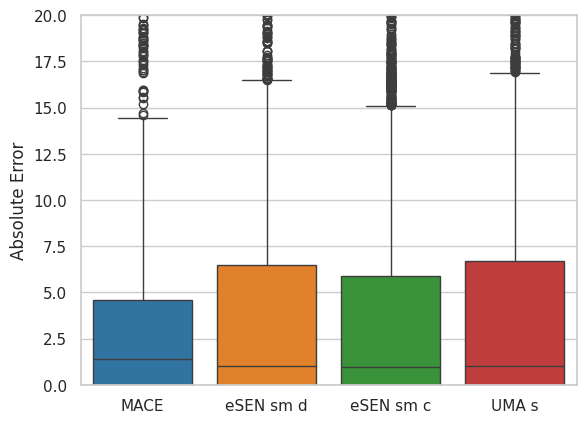

416 157 96
411 122 67
428 134 64
130 17 4


In [25]:
root["esen_d_error"] = root.esen_d_strain - root.dft_strain
root["esen_c_error"] = root.esen_c_strain - root.dft_strain
root["mace_error"] = root.mace_strain - root.dft_strain
root["uma_s_error"] = root.uma_s_strain - root.dft_strain

# switch to long format data
_df = root[["esen_d_error", "mace_error", "uma_s_error", "esen_c_error"]]
_df = _df.melt(var_name="model", value_name="error")

sns.boxplot(data=_df, y="error", x="model", palette=palette, order=["mace_error", "esen_d_error", "esen_c_error", "uma_s_error"])
plt.ylim(0, 20)
plt.ylabel("Absolute Error")
plt.xlabel("")
plt.xticks(rotation=0, labels=["MACE", "eSEN sm d", "eSEN sm c", "UMA s"], ticks=range(4))
plt.show()

print(root[root.esen_d_error > 10].shape[0], root[root.esen_d_error > 20].shape[0], root[root.esen_d_error > 30].shape[0])
print(root[root.esen_c_error > 10].shape[0], root[root.esen_c_error > 20].shape[0], root[root.esen_c_error > 30].shape[0])
print(root[root.uma_s_error > 10].shape[0], root[root.uma_s_error > 20].shape[0], root[root.uma_s_error > 30].shape[0])
print(root[root.mace_error > 10].shape[0], root[root.mace_error > 20].shape[0], root[root.mace_error > 30].shape[0])
# esen s d has more high error strains. this will drastically affect the MAE.

In [22]:
def flip_cm(cm):
    _cm = cm.copy()
    _cm[:, 0] = cm[:, 1]
    _cm[:, 1] = cm[:, 0]
    return _cm

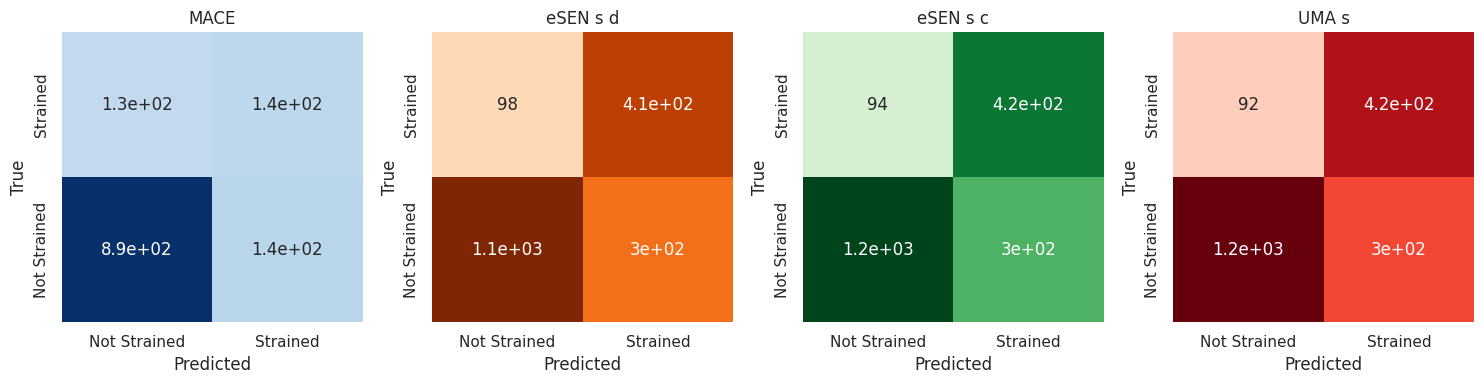

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

cm = confusion_matrix(mace_no_nan.passes_dft_filter, mace_no_nan.passes_mace_filter)
sns.heatmap(flip_cm(cm), annot=True, cmap="Blues", ax=axs[0], cbar=False, vmin=0, vmax=500)
axs[0].set(title="MACE")

cm = confusion_matrix(esen_d_no_nan.passes_dft_filter, esen_d_no_nan.passes_esen_d_filter)
sns.heatmap(flip_cm(cm), annot=True, cmap="Oranges", ax=axs[1], cbar=False, vmin=0, vmax=500)
axs[1].set(title="eSEN s d")

cm = confusion_matrix(esen_c_no_nan.passes_dft_filter, esen_c_no_nan.passes_esen_c_filter)
sns.heatmap(flip_cm(cm), annot=True, cmap="Greens", ax=axs[2], cbar=False, vmin=0, vmax=500)
axs[2].set(title="eSEN s c")

cm = confusion_matrix(uma_s_no_nan.passes_dft_filter, uma_s_no_nan.passes_uma_s_filter)
sns.heatmap(flip_cm(cm), annot=True, cmap="Reds", ax=axs[3], cbar=False, vmin=0, vmax=500)
axs[3].set(title="UMA s")

for ax in axs:
    ax.set(xlabel="Predicted", ylabel="True", xticklabels=["Not Strained", "Strained"], yticklabels=["Strained", "Not Strained"])

plt.tight_layout()
plt.show()

In [30]:
# using no_nan defined for the whole dataset
no_nan = root.dropna()
stats = pd.DataFrame(
    [
        {
            "model": "MACE",
            "mae": mean_absolute_error(no_nan.mace_strain, no_nan.dft_strain),
            "spearman": spearmanr(no_nan.mace_strain, no_nan.dft_strain)[0],
            "precision": precision_score(~no_nan.passes_dft_filter, ~no_nan.passes_mace_filter),
            "recall": recall_score(~no_nan.passes_dft_filter, ~no_nan.passes_mace_filter),
            "f1_score": f1_score(~no_nan.passes_dft_filter, ~no_nan.passes_mace_filter),
        },
        {
            "model": "eSEN s d",
            "mae": mean_absolute_error(no_nan.esen_d_strain, no_nan.dft_strain),
            "spearman": spearmanr(no_nan.esen_d_strain, no_nan.dft_strain)[0],
            "precision": precision_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_d_filter),
            "recall": recall_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_d_filter),
            "f1_score": f1_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_d_filter),
        },
        {
            "model": "eSEN s c",
            "mae": mean_absolute_error(no_nan.esen_c_strain, no_nan.dft_strain),
            "spearman": spearmanr(no_nan.esen_c_strain, no_nan.dft_strain)[0],
            "precision": precision_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_c_filter),
            "recall": recall_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_c_filter),
            "f1_score": f1_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_c_filter),
        },
        {
            "model": "UMA s",
            "mae": mean_absolute_error(no_nan.uma_s_strain, no_nan.dft_strain),
            "spearman": spearmanr(no_nan.uma_s_strain, no_nan.dft_strain)[0],
            "precision": precision_score(~no_nan.passes_dft_filter, ~no_nan.passes_uma_s_filter),
            "recall": recall_score(~no_nan.passes_dft_filter, ~no_nan.passes_uma_s_filter),
            "f1_score": f1_score(~no_nan.passes_dft_filter, ~no_nan.passes_uma_s_filter),
        }
    ]
)
stats

,model,mae,spearman,precision,recall,f1_score
0,MACE,6.226053,0.556105,0.496454,0.516605,0.506329
1,eSEN s d,4.640363,0.791691,0.678201,0.723247,0.700000
2,eSEN s c,4.373450,0.795210,0.695341,0.715867,0.705455
3,UMA s,4.569111,0.790353,0.692308,0.730627,0.710952


In [31]:
# using the no_nan defined for each pair
lst = []

lst.append({
    "model": "MACE",
    "mae": mean_absolute_error(mace_no_nan.mace_strain, mace_no_nan.dft_strain),
    "spearman": spearmanr(mace_no_nan.mace_strain, mace_no_nan.dft_strain)[0],
    "precision": precision_score(~mace_no_nan.passes_dft_filter, ~mace_no_nan.passes_mace_filter),
    "recall": recall_score(~mace_no_nan.passes_dft_filter, ~mace_no_nan.passes_mace_filter),
    "f1_score": f1_score(~mace_no_nan.passes_dft_filter, ~mace_no_nan.passes_mace_filter),
})

lst.append({    
    "model": "eSEN s d",
    "mae": mean_absolute_error(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain),
    "spearman": spearmanr(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain)[0],
    "precision": precision_score(~esen_d_no_nan.passes_dft_filter, ~esen_d_no_nan.passes_esen_d_filter),
    "recall": recall_score(~esen_d_no_nan.passes_dft_filter, ~esen_d_no_nan.passes_esen_d_filter),
    "f1_score": f1_score(~esen_d_no_nan.passes_dft_filter, ~esen_d_no_nan.passes_esen_d_filter),
})
lst.append({
    "model": "eSEN s c",
    "mae": mean_absolute_error(esen_c_no_nan.esen_c_strain, esen_c_no_nan.dft_strain),
    "spearman": spearmanr(esen_c_no_nan.esen_c_strain, esen_c_no_nan.dft_strain)[0],
    "precision": precision_score(~esen_c_no_nan.passes_dft_filter, ~esen_c_no_nan.passes_esen_c_filter),
    "recall": recall_score(~esen_c_no_nan.passes_dft_filter, ~esen_c_no_nan.passes_esen_c_filter),
    "f1_score": f1_score(~esen_c_no_nan.passes_dft_filter, ~esen_c_no_nan.passes_esen_c_filter),
})
lst.append({
    "model": "UMA s",
    "mae": mean_absolute_error(uma_s_no_nan.uma_s_strain, uma_s_no_nan.dft_strain),
    "spearman": spearmanr(uma_s_no_nan.uma_s_strain, uma_s_no_nan.dft_strain)[0],
    "precision": precision_score(~uma_s_no_nan.passes_dft_filter, ~uma_s_no_nan.passes_uma_s_filter),
    "recall": recall_score(~uma_s_no_nan.passes_dft_filter, ~uma_s_no_nan.passes_uma_s_filter),
    "f1_score": f1_score(~uma_s_no_nan.passes_dft_filter, ~uma_s_no_nan.passes_uma_s_filter),
})

stats2 = pd.DataFrame(lst)
stats2

,model,mae,spearman,precision,recall,f1_score
0,MACE,6.139123,0.556888,0.492958,0.516605,0.504505
1,eSEN s d,7.384462,0.719458,0.574048,0.805941,0.670511
2,eSEN s c,7.591153,0.726404,0.584507,0.815324,0.680886
3,UMA s,7.255927,0.720783,0.584853,0.819253,0.682488


-2 (455, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


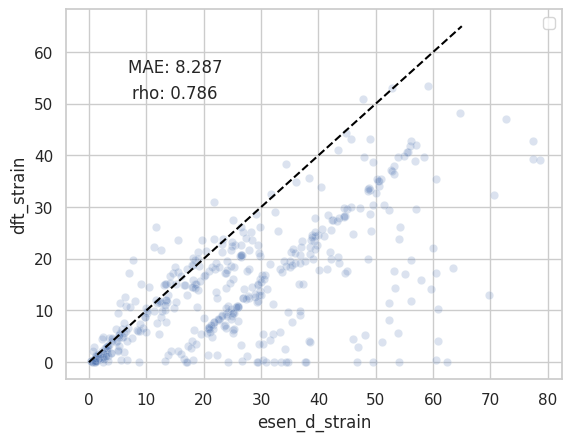

1 (466, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


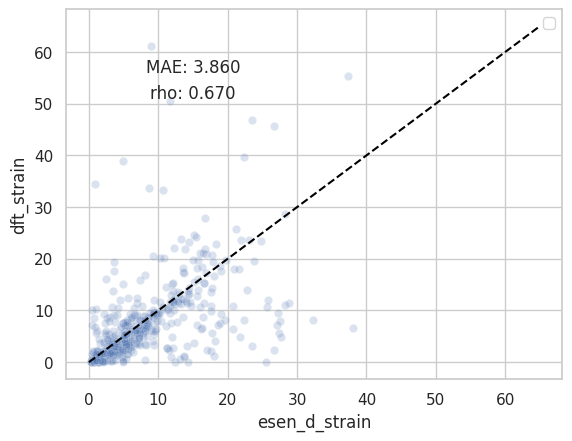

-3 (153, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


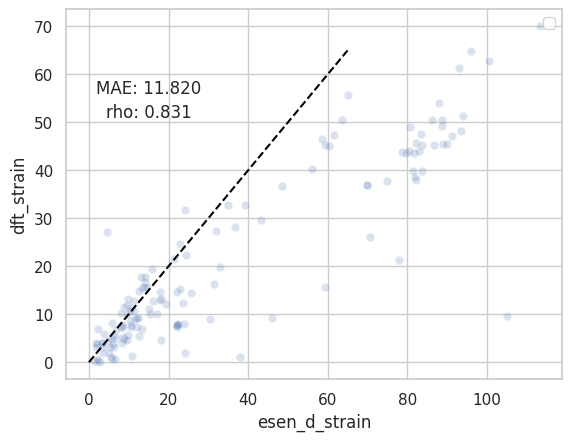

-1 (838, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


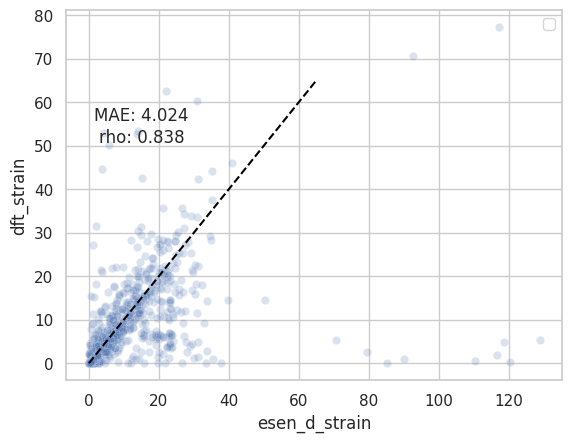

2 (34, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


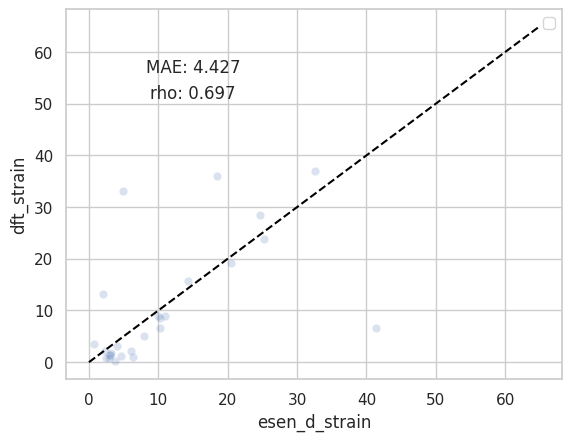

-4 (34, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


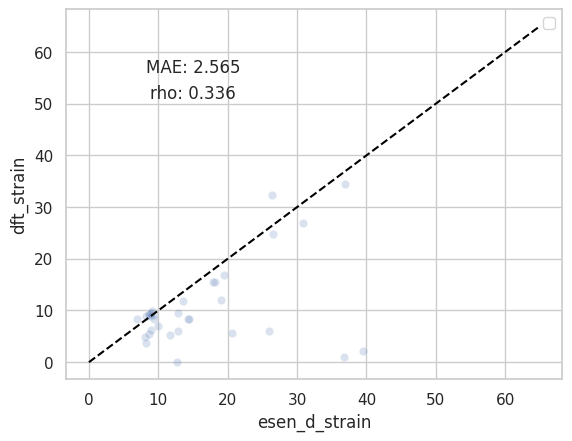

4 (3, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


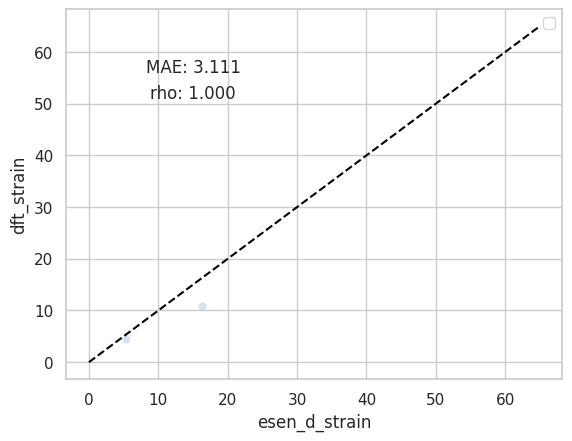

3 (11, 16)


/tmp/ipykernel_857732/3003172036.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


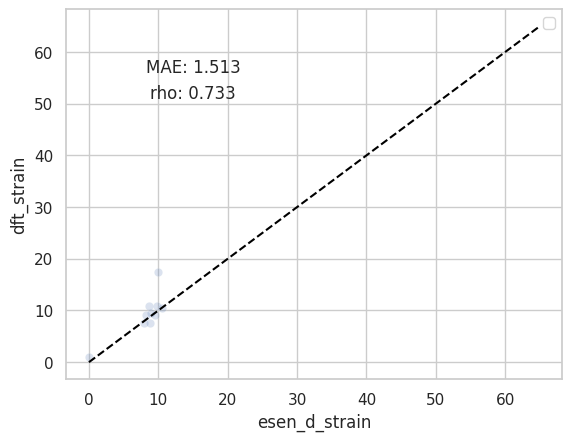

-5 (3, 16)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

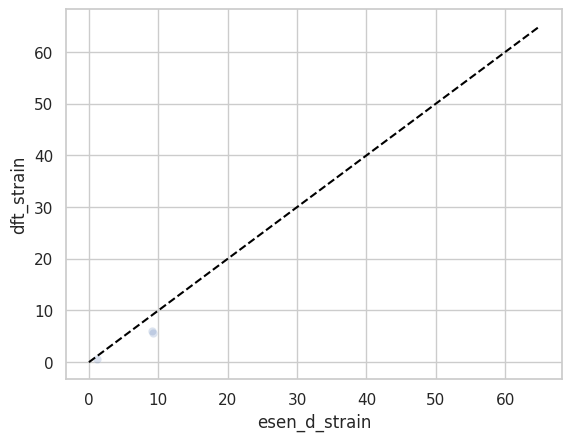

In [32]:
for ch in root.formal_charge.unique():
    _df = root[root.formal_charge == ch]
    _no_nan = _df.dropna()
    print(ch, _df.shape)
    sns.scatterplot(x="esen_d_strain", y="dft_strain", data=_df, alpha=0.2)
    sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--")
    plt.text(15, 57, f"MAE: {mean_absolute_error(_no_nan.esen_d_strain, _no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
    plt.text(15, 52, f"rho: {spearmanr(_no_nan.esen_d_strain, _no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center")
    plt.legend()
    plt.show()